<a href="https://colab.research.google.com/github/AsadShibli/semantic-segmentation/blob/main/unet_on_camvid(attempt-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

In [41]:

  from google.colab import drive
  drive.mount('/content/drive')


  import zipfile

  # Specify the path to the ZIP file you want to extract
  file_path = "/content/drive/MyDrive/projects/segmentation-camVid dataset/archive.zip"

  # Specify the directory where you want to extract the contents
  file_extraction_dir = '/content/'

  # Open the ZIP file in read-only mode using a context manager
  with zipfile.ZipFile(file_path, "r") as file_ref:

      # Extract all files and directories from the ZIP file to the specified extraction directory
      file_ref.extractall(file_extraction_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
BASE_PATH = "CamVid/"

In [43]:
print("NO. test imgs ", len(glob(BASE_PATH+"test/*")))
print("NO. test labels ", len(glob(BASE_PATH+"test_labels/*")))
print("NO. train imgs ", len(glob(BASE_PATH+"train/*")))
print("NO. train labels ", len(glob(BASE_PATH+"train_labels/*")))
print("NO. val imgs ", len(glob(BASE_PATH+"val/*")))
print("NO. val labels ", len(glob(BASE_PATH+"val_labels/*")))

NO. test imgs  232
NO. test labels  232
NO. train imgs  369
NO. train labels  369
NO. val imgs  100
NO. val labels  100


In [44]:
import pandas as pd
classes = pd.read_csv(BASE_PATH+"class_dict.csv")

In [45]:
n_classes = len(classes)

In [46]:
classes = classes.set_index("name")

In [47]:
classes_dict = {cl:list(classes.loc[cl, :]) for cl in classes.index}
classes_dict

{'Animal': [64, 128, 64],
 'Archway': [192, 0, 128],
 'Bicyclist': [0, 128, 192],
 'Bridge': [0, 128, 64],
 'Building': [128, 0, 0],
 'Car': [64, 0, 128],
 'CartLuggagePram': [64, 0, 192],
 'Child': [192, 128, 64],
 'Column_Pole': [192, 192, 128],
 'Fence': [64, 64, 128],
 'LaneMkgsDriv': [128, 0, 192],
 'LaneMkgsNonDriv': [192, 0, 64],
 'Misc_Text': [128, 128, 64],
 'MotorcycleScooter': [192, 0, 192],
 'OtherMoving': [128, 64, 64],
 'ParkingBlock': [64, 192, 128],
 'Pedestrian': [64, 64, 0],
 'Road': [128, 64, 128],
 'RoadShoulder': [128, 128, 192],
 'Sidewalk': [0, 0, 192],
 'SignSymbol': [192, 128, 128],
 'Sky': [128, 128, 128],
 'SUVPickupTruck': [64, 128, 192],
 'TrafficCone': [0, 0, 64],
 'TrafficLight': [0, 64, 64],
 'Train': [192, 64, 128],
 'Tree': [128, 128, 0],
 'Truck_Bus': [192, 128, 192],
 'Tunnel': [64, 0, 64],
 'VegetationMisc': [192, 192, 0],
 'Void': [0, 0, 0],
 'Wall': [64, 192, 0]}

In [48]:
def show_img(img , mask=False):
    fig ,ax = plt.subplots(figsize=(6,6))
    if not mask:
        img = plt.imread(BASE_PATH+img)
    ax.imshow(img)
    plt.show()
    return img

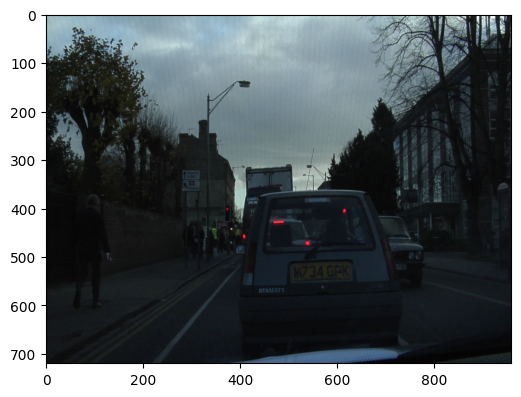

array([[[0.6       , 0.7019608 , 0.7294118 ],
        [0.6       , 0.7019608 , 0.7294118 ],
        [0.58431375, 0.6901961 , 0.7254902 ],
        ...,
        [0.10588235, 0.12156863, 0.10980392],
        [0.10196079, 0.10588235, 0.09803922],
        [0.09411765, 0.09803922, 0.09019608]],

       [[0.58431375, 0.6862745 , 0.7137255 ],
        [0.6       , 0.7019608 , 0.7294118 ],
        [0.5921569 , 0.69803923, 0.73333335],
        ...,
        [0.10588235, 0.12156863, 0.10980392],
        [0.10196079, 0.10588235, 0.10588235],
        [0.09411765, 0.09803922, 0.09803922]],

       [[0.60784316, 0.70980394, 0.7372549 ],
        [0.6156863 , 0.7176471 , 0.74509805],
        [0.60784316, 0.7176471 , 0.7411765 ],
        ...,
        [0.10588235, 0.12156863, 0.11764706],
        [0.10196079, 0.10588235, 0.10588235],
        [0.09411765, 0.09803922, 0.09803922]],

       ...,

       [[0.06666667, 0.06666667, 0.07450981],
        [0.05882353, 0.05882353, 0.06666667],
        [0.05098039, 0

In [49]:
show_img("train/0001TP_009210.png")

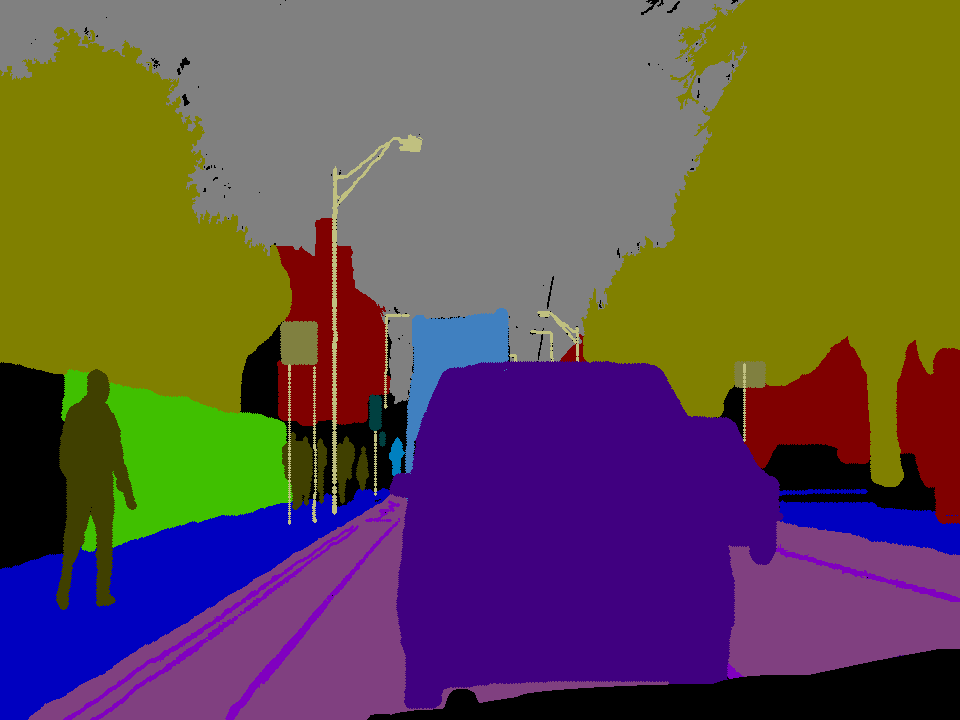

In [50]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img(BASE_PATH + '/train_labels/0001TP_009210_L.png')
img
#img = show_img("train_labels/0001TP_009210_L.png")

In [51]:
img = np.array(img)
print(img.shape)

print(len(classes_dict.values()))

(720, 960, 3)
32


In [52]:

c_st =  []
for colour in list(classes_dict.values()):
    c_st.append(colour)


print(np.equal(c_st[6], c_st[6]))
print(np.equal(c_st[6], c_st[8]))
print(np.equal(c_st[6], c_st[1]))
print('--------------------------------'  )
print(c_st[6], c_st[8], c_st[1]   )


[ True  True  True]
[False False False]
[False  True False]
--------------------------------
[64, 0, 192] [192, 192, 128] [192, 0, 128]


name of the class: Sky


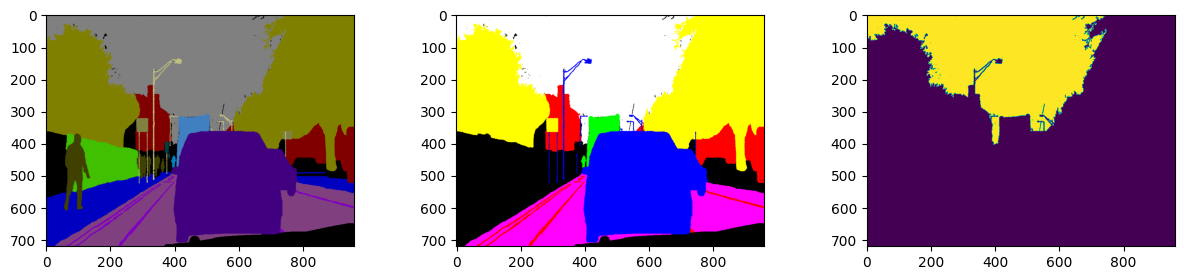

In [53]:
class_name = list( (classes_dict.keys()))
class_id = 21

case_all_class = np.float32(np.equal(c_st[class_id ], img)*1)
case_true_class =  np.float32(np.all(np.equal(c_st[class_id ], img), axis = -1)*1)


figsize=(15, 3)
_, axes = plt.subplots(nrows=1, ncols= 3, figsize=figsize)

axes[0].imshow(img)
axes[1].imshow(case_all_class )
axes[2].imshow(case_true_class, cmap='gray')

print('name of the class:', class_name[class_id ]   )

plt.imshow(case_all_class)
plt.imshow(case_true_class)

In [54]:
def adjust_mask(mask, flat=False):

    semantic_map = []
    for colour in list(classes_dict.values()):
        equality = np.equal(mask, colour)# 256x256x3 with True or False
        class_map = np.all(equality, axis = -1)# 256x256 If all True, then True, else False
        semantic_map.append(class_map)# List of 256x256 arrays, map of True for a given found color at the pixel, and False otherwise.
    semantic_map = np.stack(semantic_map, axis=-1)# 256x256x32 True only at the found color, and all False otherwise.
    if flat:
        semantic_map = np.reshape(semantic_map, (-1,256*256))

    return np.float32(semantic_map)# convert to numbers

In [55]:
new_mask = adjust_mask(img)
print(new_mask.shape,img.shape)

(720, 960, 32) (720, 960, 3)


In [56]:
idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(classes_dict.items())}

In [57]:
idx2rgb

{0: array([ 64, 128,  64]),
 1: array([192,   0, 128]),
 2: array([  0, 128, 192]),
 3: array([  0, 128,  64]),
 4: array([128,   0,   0]),
 5: array([ 64,   0, 128]),
 6: array([ 64,   0, 192]),
 7: array([192, 128,  64]),
 8: array([192, 192, 128]),
 9: array([ 64,  64, 128]),
 10: array([128,   0, 192]),
 11: array([192,   0,  64]),
 12: array([128, 128,  64]),
 13: array([192,   0, 192]),
 14: array([128,  64,  64]),
 15: array([ 64, 192, 128]),
 16: array([64, 64,  0]),
 17: array([128,  64, 128]),
 18: array([128, 128, 192]),
 19: array([  0,   0, 192]),
 20: array([192, 128, 128]),
 21: array([128, 128, 128]),
 22: array([ 64, 128, 192]),
 23: array([ 0,  0, 64]),
 24: array([ 0, 64, 64]),
 25: array([192,  64, 128]),
 26: array([128, 128,   0]),
 27: array([192, 128, 192]),
 28: array([64,  0, 64]),
 29: array([192, 192,   0]),
 30: array([0, 0, 0]),
 31: array([ 64, 192,   0])}

In [58]:
def map_class_to_rgb(p):
    return idx2rgb[p[0]]

In [59]:
# The purpose is, when you get the (nxmxclass_dim) shaped segmentation map, you need to convert it
# into an image (nxmx3). Below you do that for new_mask array/map from previous block.

rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(np.argmax(new_mask, axis=-1), -1))

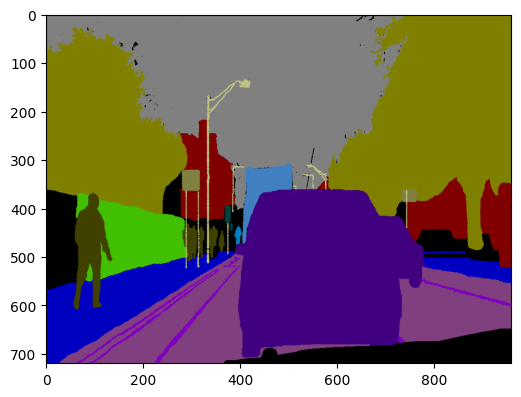

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128,   0],
        [128, 128,   0],
        [128, 128,   0]],

       ...,

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 192],
        [  0,   0, 192],
        [  0,   0, 192],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [60]:
show_img(rgb_mask,mask=True)

In [61]:
import numpy as np
import os
import tensorflow as tf
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *

from tensorflow.keras  import backend as keras

In [62]:


def dice(y_true, y_pred, smooth=1):

    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])
    dicef = K.mean((2. * intersection + smooth)/(union + smooth), axis=-1)
    return dicef


def IOU(y_true, y_pred, smooth=1):

    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])-intersection
    iou_scr = K.mean(( intersection + smooth)/(union + smooth), axis=-1)
    return iou_scr

In [96]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_resnet50_unet(input_shape , ohe=True,flat=False):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained ResNet50 Model """
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    s1 = first_layer = resnet50.layers[0].output           ## (512 x 512)
    s2 = resnet50.get_layer("conv1_relu").output        ## (256 x 256)
    s3 = resnet50.get_layer("conv2_block3_out").output  ## (128 x 128)
    s4 = resnet50.get_layer("conv3_block4_out").output  ## (64 x 64)

    """ Bridge """
    b1 = resnet50.get_layer("conv4_block6_out").output  ## (32 x 32)

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)                     ## (64 x 64)
    d2 = decoder_block(d1, s3, 256)                     ## (128 x 128)
    d3 = decoder_block(d2, s2, 128)                     ## (256 x 256)
    d4 = decoder_block(d3, s1, 64)                      ## (512 x 512)

    """ Output """


    conv10 = Conv2D(n_classes, (1,1), padding='same')(d4)
    if flat:
      outputs = tf.keras.layers.Reshape((256*256,n_classes))(conv10)
    else:
      outputs = conv10
    outputs = Activation('softmax')(outputs)

    model = Model(inputs, outputs, name="ResNet50_U-Net")
    Adam =  tf.keras.optimizers.Adam
    if ohe:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy',dice, IOU])
    else:
      model.compile(optimizer = Adam(lr = 1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy',dice])



    return model

if __name__ == "__main__":
    input_shape = (512, 512, 3)
    model = build_resnet50_unet(input_shape)
    model.summary()

Model: "ResNet50_U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 518, 518, 3)          0         ['input_19[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 256, 256, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 256, 256, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                 

In [77]:
input_shape = (512, 512, 3)
inputs = Input(input_shape)
resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

for layer in resnet50.layers:
    printz(layer.name)


input_13
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3

In [78]:
# def load_CAMVID(data_type='train', enc='ohe', shape='normal'):
#   img_path = str(BASE_PATH) + '/' + data_type + '/'
#   labels_path = str(BASE_PATH) + '/' + data_type + '_labels/'
#   # without adding target_size=(256,256) in load_img we get Out of mem: 421x960x720x32x4bytes is around 34GB!
#   x = np.array([np.array(load_img(str(img_path) + file, target_size=(256,256)))*1./255 for file in sorted(os.listdir(img_path))])
#   if(enc=='ohe'):
#     y = np.array([adjust_mask(np.array(load_img(str(labels_path) + file, target_size=(256,256)))) for file in sorted(os.listdir(labels_path))])
#   return x, y

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
#config
view = 0
batch_sz = 8
epochs = 10

validation_steps = 32

In [99]:
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
#image_datagen.fit(images, augment=True, seed=seed)
#mask_datagen.fit(masks, augment=True, seed=seed)

image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['train'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))
mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['train_labels'],
    class_mode=None,
    seed=seed,
    color_mode='rgb',
    batch_size=batch_sz,
    target_size=(256,256))

# combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

val_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['val'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

val_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['val_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))
val_generator = zip(val_image_generator, val_mask_generator)


Found 369 images belonging to 1 classes.
Found 369 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [100]:
def train_generator_fn():
    for (img,mask) in train_generator:


        new_mask = adjust_mask(mask)
        yield (img,new_mask)

In [101]:
def val_generator_fn():
    for (img,mask) in val_generator:
        new_mask = adjust_mask(mask)
        yield (img,new_mask)

In [102]:
n_train_samples = len(os.listdir(str(BASE_PATH) + '/train/'))
n_train_samples

369

In [103]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the number of classes (adjust this according to your use case)


# Define your ResNet50 U-Net model with the input shape and number of classes
model = build_resnet50_unet(input_shape=(256, 256, 3))

# Define a ModelCheckpoint to save the best model weights during training
model_checkpoint = ModelCheckpoint('resnet50_unet.hdf5', monitor='val_loss', verbose=1, save_best_only=True)


# Define dice coefficient loss function
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1, 2, 3])
    union = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3])
    dice = K.mean((2.0 * intersection + smooth) / (union + smooth), axis=0)
    return dice


model_checkpoint = ModelCheckpoint('unet_camvid.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
model.fit(train_generator_fn(),
                    validation_data=val_generator_fn(),
                    steps_per_epoch=n_train_samples//batch_sz,
                    validation_steps=validation_steps,
                    epochs=epochs,
                    callbacks=[model_checkpoint])


Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 1.4273 - accuracy: 0.6947 - dice: 0.6601 - IOU: 0.6271
Epoch 1: val_loss improved from inf to 4.38672, saving model to unet_camvid.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 177s 2s/step - loss: 1.4273 - accuracy: 0.6947 - dice: 0.6601 - IOU: 0.6271 - val_loss: 4.3867 - val_accuracy: 0.0634 - val_dice: 0.3614 - val_IOU: 0.3550
Epoch 2/10
46/46 [==============================] - ETA: 0s - loss: 0.8395 - accuracy: 0.7942 - dice: 0.7801 - IOU: 0.7504
Epoch 2: val_loss improved from 4.38672 to 3.32897, saving model to unet_camvid.hdf5
46/46 [==============================] - 78s 2s/step - loss: 0.8395 - accuracy: 0.7942 - dice: 0.7801 - IOU: 0.7504 - val_loss: 3.3290 - val_accuracy: 0.2482 - val_dice: 0.4181 - val_IOU: 0.4010
Epoch 3/10
46/46 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.8206 - dice: 0.8111 - IOU: 0.7842
Epoch 3: val_loss improved from 3.32897 to 2.10864, saving model to unet_camvid.hdf5
46/46 [==============================] - 85s 2s/step - loss: 0.6924 - accuracy: 0.8206 - dice: 0.8111 - IOU: 0.7842 - val_loss: 2.1086 - val_accuracy: 0.4436 - val_dice: 0.5821 - val_IOU: 0.558

In [105]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  fig , ax = plt.subplots(1,3,figsize=(10,10))

  # Img
  ax[0].imshow(img)
  ax[0].set_title("Orignal Image")

  # Predict
  pred_mask = model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need

  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))

  # Prediction
  ax[1].imshow(rgb_mask)
  ax[1].set_title("Predicted Mask")


  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))

  ax[2].imshow((gt_mask).astype(np.uint8))
  ax[2].set_title("Ground truth")

1/1 [==============================] - 1s 943ms/step


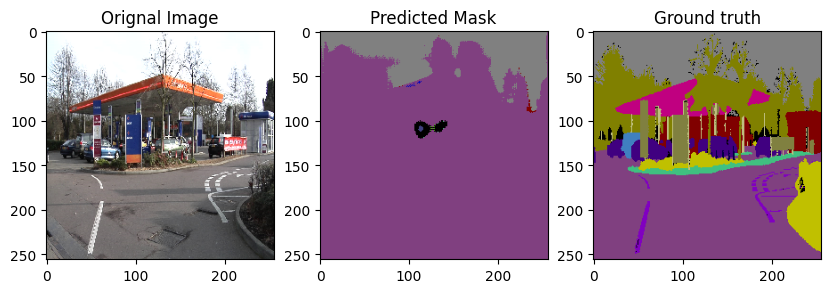

In [106]:
img = next(val_image_generator)[0]
gt_img = next(val_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')

In [107]:
def compute_metrics(y_true, y_pred):
  '''
  Computes IOU and Dice Score.

  Args:
    y_true (tensor) - ground truth label map
    y_pred (tensor) - predicted label map
  '''

  class_wise_iou = []
  class_wise_dice_score = []

  smoothening_factor = 0.00001

  for i in range(32):
    intersection = np.sum((y_pred == i) * (y_true == i))
    y_true_area = np.sum((y_true == i))
    y_pred_area = np.sum((y_pred == i))
    combined_area = y_true_area + y_pred_area

    iou = (intersection + smoothening_factor) / (combined_area - intersection + smoothening_factor)
    class_wise_iou.append(iou)

    dice_score =  2 * ((intersection + smoothening_factor) / (combined_area + smoothening_factor))
    class_wise_dice_score.append(dice_score)

    return class_wise_iou, class_wise_dice_score

In [108]:
p_img = model.predict(np.expand_dims(img, 0))[0]
pred_mask = np.argmax(p_img, axis=-1)
rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))



im_iou, im_dice = compute_metrics(np.uint8(gt_img),np.uint8(rgb_mask))

print('iou score, dice score',im_iou, im_dice  )

1/1 [==============================] - 0s 46ms/step
iou score, dice score [0.02303754298272593] [0.04503753190317651]


In [109]:
p_img.shape

(256, 256, 32)

In [110]:
pred_mask.shape

(256, 256)